# 요약

*



In [1]:
# Library import
import numpy as np
import random
import matplotlib.pyplot as plt
import inspect


In [2]:
N = 5  # Maximum number of possible peak
Data_size = 200000 

Parameters = np.zeros((Data_size, N, 2))  # Set of Parameters ready
print(Parameters.shape[1])

5


In [3]:
# Lorentzian function that returns sum of multi-Lorentzian function with two arguments
def Lorentzian(x, *args):
    ''' returns sum of Multi-Lorentzian function 
    corresponding to each two arguments (a, b)'''
    a = args[::2]
    b = args[1::2]

    result = 0
    for i in range(len(a)):
        if a[i] > 0 and b[i] > 0:
            if len(a) == len(b):
                result += b[i] / ((x - a[i])**2 + b[i]**2)

    for xx in range(len(result)):
        result[xx] += 0.1* ((np.random.rand()*2) - 1)

    return result 
    # noise = -0.2 ~ 0.2 

In [4]:
print(inspect.getsource(Lorentzian))

def Lorentzian(x, *args):
    ''' returns sum of Multi-Lorentzian function 
    corresponding to each two arguments (a, b)'''
    a = args[::2]
    b = args[1::2]

    result = 0
    for i in range(len(a)):
        if a[i] > 0 and b[i] > 0:
            if len(a) == len(b):
                result += b[i] / ((x - a[i])**2 + b[i]**2)

    for xx in range(len(result)):
        result[xx] += 0.1* ((np.random.rand()*2) - 1)

    return result 



In [5]:
# X domain fixed
x = np.arange(-2, 11, 0.01)
print(len(x))

1300


In [6]:
for i in range(len(Parameters)): # For each matrix in Parameter set...

    for j in range(Parameters.shape[1]): # For each raw in each matrix...
        
        # append two argument that will be used in Lorentzian function
        # Second parameter is constrained in range from 0.1 to 0.2
        a = np.random.rand()
        Parameters[i][0] = np.array([[a, 0.1*np.random.rand() + 0.1]])
        Parameters[i][1] = np.array([[a + 1 + np.random.rand() , 0.1*np.random.rand()+0.1]])
        Parameters[i][2] = np.array([[a + 2 + np.random.rand() , 0.1*np.random.rand()+0.1]])
        Parameters[i][3] = np.array([[a + 3 + np.random.rand() , 0.1*np.random.rand()+0.1]])
        Parameters[i][4] = np.array([[a + 4 + np.random.rand() , 0.1*np.random.rand()+0.1]])
    
# Check out
print(Parameters)

[[[0.83754277 0.11779263]
  [2.65619823 0.15007153]
  [3.17967747 0.16568683]
  [3.89554513 0.15582615]
  [5.81914339 0.18463544]]

 [[0.56438172 0.19545822]
  [2.1717837  0.14605444]
  [2.59953599 0.18703443]
  [4.49092156 0.16527048]
  [4.64661642 0.1628544 ]]

 [[0.76032732 0.17187005]
  [2.68338236 0.14903656]
  [3.41252581 0.19723596]
  [3.94837029 0.11497377]
  [5.34177174 0.19758474]]

 ...

 [[0.88635418 0.1754898 ]
  [2.37404154 0.17637266]
  [3.66100949 0.18309119]
  [4.63682029 0.12866954]
  [5.17901936 0.16247586]]

 [[0.92797272 0.17803686]
  [2.82406838 0.18869735]
  [3.57684955 0.12976858]
  [4.62067947 0.15488039]
  [5.57616876 0.12210897]]

 [[0.12197731 0.12390754]
  [1.94370734 0.12651514]
  [3.01932236 0.10584539]
  [3.28056402 0.18609066]
  [4.46100501 0.10102236]]]


In [7]:
# ================== Data Generating ================
Data_x = []
Data_y = []

for j in Parameters:  # For each parameter matrix...

    peak = random.randint(5, N) # Random selection of Possible peak number
    j = list(j.reshape((2*N,))) # reshape processing to put it as *args in function, Since j is matrix

    if peak == 1:
        Data_x.append(Lorentzian(x, *j[0:2]))
        Data_y.append(np.array([sum(Lorentzian(x, *j[0:2])), peak]))

    elif peak == 2:
        Data_x.append(Lorentzian(x, *j[0:4]))
        Data_y.append(np.array([j[0], j[1], j[2], j[3]]))

    elif peak == 3:
        Data_x.append(Lorentzian(x, *j[0:6]))
        Data_y.append(np.array([sum(Lorentzian(x, *j[0:6])) ,peak]))

    elif peak == 4:
        Data_x.append(Lorentzian(x, *j[0:8]))
        Data_y.append(np.array([sum(Lorentzian(x, *j[0:8])), peak]))

    elif peak == 5:
        Data_x.append(Lorentzian(x, *j[0:]))
        Data_y.append(np.array([j[0],j[1],j[2],j[3],j[4],j[5],j[6],j[7],j[8],j[9]]))

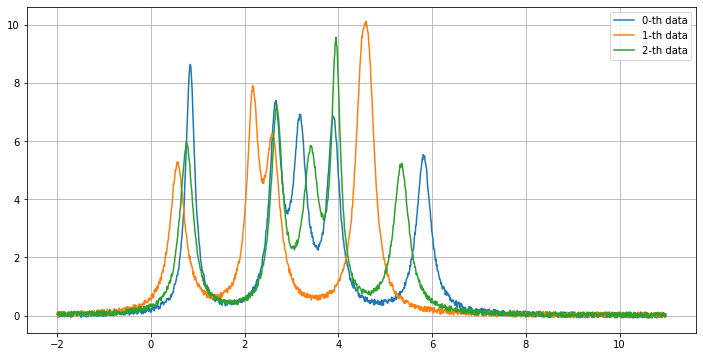

In [8]:
# Generated Data sample check!
plt.figure(figsize=(12, 6))

for i in range(3):
    plt.plot(x, Data_x[i], label = str(i) + '-th data')
    plt.legend()
    plt.grid('on')

In [9]:
x.shape
x = x.reshape(len(x))
x.shape

(1300,)

In [10]:
# Data spliting up into three group : training/validation/test

train_data = np.array(Data_x[:100000])
val_data = np.array(Data_x[100000:150000])
test_data = np.array(Data_x[150000:])

train_labels = np.array(Data_y[:100000])
val_labels = np.array(Data_y[100000:150000])
test_labels = np.array(Data_y[150000:])

In [11]:
# size test

print(train_data.shape, train_labels.shape)
print(val_data.shape, val_labels.shape)
print(test_data.shape, test_labels.shape)

(100000, 1300) (100000, 10)
(50000, 1300) (50000, 10)
(50000, 1300) (50000, 10)


In [12]:
# reshape for Image-form setting
# 2차원일때만!
#train_data = train_data.reshape(100000, 20, 20, 1)
#val_data = val_data.reshape(150000, 20, 20, 1)
#test_data = test_data.reshape(50000, 20, 20, 1)


In [13]:
# reshape for Image-form setting
# 1차원일때 변환
train_data = train_data.reshape(100000, len(x), 1)
val_data = val_data.reshape(50000, len(x), 1)
test_data = test_data.reshape(50000, len(x), 1)


In [14]:
# From Here on, let`s start to make Convolution Neural Network!
# Library import
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

# Modeling
model2 = Sequential()

model2.add(Conv1D(32, 100, activation='relu', input_shape=(len(x), 1)))
model2.add(MaxPooling1D(2)) 

model2.add(Conv1D(32, 50, activation='relu'))
model2.add(MaxPooling1D(2)) 

model2.add(Conv1D(32, 30, activation='relu'))
model2.add(MaxPooling1D(2)) 

# Fully-Connected Layers
model2.add(GlobalMaxPooling1D())
model2.add(Dense(100, activation = 'relu'))
#model2.add(Dropout(0.3))
model2.add(Dense(10))

model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 1201, 32)          3232      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 600, 32)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 551, 32)           51232     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 275, 32)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 246, 32)           30752     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 123, 32)           0         
_________________________________________________________________
global_max_pooling1d (Global (None, 32)                0

In [15]:
model2.compile(loss='mse', metrics=['mae'], optimizer=Adam())


In [16]:
import keras.backend as K

import inspect
import keras
print(inspect.getsource(keras.losses.mae))

def mean_absolute_error(y_true, y_pred):
    if not K.is_tensor(y_pred):
        y_pred = K.constant(y_pred)
    y_true = K.cast(y_true, y_pred.dtype)
    return K.mean(K.abs(y_pred - y_true), axis=-1)



Using TensorFlow backend.


In [17]:
def mean_squared_error(y_true, y_pred):
    if not K.is_tensor(y_pred):
        y_pred = K.constant(y_pred)
    y_true = K.cast(y_true, y_pred.dtype)
    
    loss = 0
    for i in range(y_pred.shape[1]):
        if i%2 == 0 : # 0, 2, 4, 6, 8
            loss += K.mean(K.square(y_pred[i] - y_true[i]), axis = -1)
        else: # 1, 3, 5, 7, 9, beta terms
            loss += 1000 * K.mean(K.square(y_pred[i] - y_true[i]), axis=-1)

    return loss


In [18]:
%%time
hist2 = model2.fit(train_data, train_labels, 
                   epochs=30, 
                   batch_size=2000,
                   validation_data=(val_data, val_labels), verbose=1)

Epoch 1/30
50/50 [==============================] - 18s 358ms/step - loss: 0.3893 - mae: 0.3456 - val_loss: 0.1123 - val_mae: 0.2111
Epoch 2/30
50/50 [==============================] - 18s 358ms/step - loss: 0.0950 - mae: 0.1939 - val_loss: 0.0750 - val_mae: 0.1764
Epoch 3/30
50/50 [==============================] - 18s 361ms/step - loss: 0.0550 - mae: 0.1515 - val_loss: 0.0381 - val_mae: 0.1298
Epoch 4/30
50/50 [==============================] - 18s 364ms/step - loss: 0.0316 - mae: 0.1185 - val_loss: 0.0276 - val_mae: 0.1110
Epoch 5/30
50/50 [==============================] - 18s 363ms/step - loss: 0.0242 - mae: 0.1030 - val_loss: 0.0204 - val_mae: 0.0949
Epoch 6/30
50/50 [==============================] - 18s 365ms/step - loss: 0.0229 - mae: 0.0972 - val_loss: 0.0186 - val_mae: 0.0881
Epoch 7/30
50/50 [==============================] - 18s 363ms/step - loss: 0.0161 - mae: 0.0825 - val_loss: 0.0144 - val_mae: 0.0780
Epoch 8/30
50/50 [==============================] - 18s 363ms/step - 

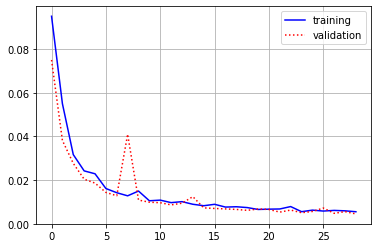

In [19]:
# Loss plot
plt.plot(hist2.history['loss'][1:], 'b-', label="training")
plt.plot(hist2.history['val_loss'][1:], 'r:', label="validation")
plt.grid(True)
plt.legend()
plt.show()

In [20]:
predict = model2.predict(test_data)
predict.shape

(50000, 10)

In [21]:
for i in range(10):
    print(predict[i])
    print(test_labels[i])
    print('==============')

[0.84928876 0.12867548 2.5694711  0.14170164 3.6876268  0.15445727
 3.999305   0.14486352 5.5587187  0.12357052]
[0.84734473 0.13221471 2.55914079 0.14268634 3.75497607 0.18532287
 3.99100612 0.13728611 5.50581156 0.12530087]
[0.31186125 0.12849559 2.1904917  0.1528832  2.6590526  0.14422151
 4.187837   0.16707724 5.093662   0.14770655]
[0.32478411 0.14507106 2.19766996 0.10300523 2.3870806  0.18478111
 4.19543549 0.10806482 5.16915707 0.19094703]
[0.98448443 0.16977024 2.7520013  0.1640012  3.7398677  0.13367721
 4.197077   0.1653948  5.486945   0.14943497]
[0.97896626 0.14442141 2.73928022 0.15718634 3.78643535 0.11199911
 4.23629629 0.18015683 5.44277228 0.14205638]
[0.9605869  0.16373755 2.188793   0.12019367 3.1730707  0.15909347
 4.632333   0.15809782 5.2642303  0.1702379 ]
[0.96399285 0.16367332 2.21210389 0.1287203  3.08747689 0.17836409
 4.56118417 0.12233022 5.22354648 0.15172563]
[0.08081453 0.1686454  1.8334428  0.14229451 2.6314263  0.10949451
 3.6661067  0.11584731 4.8259

In [22]:
def simple(x, *args):
    ''' returns sum of Multi-Lorentzian function 
    corresponding to each two arguments (a, b)'''
    a = args[::2]
    b = args[1::2]

    result = 0
    for i in range(len(a)):
        if a[i] > 0 and b[i] > 0:
            if len(a) == len(b):
                result += b[i] / ((x - a[i])**2 + b[i]**2)

    return result 

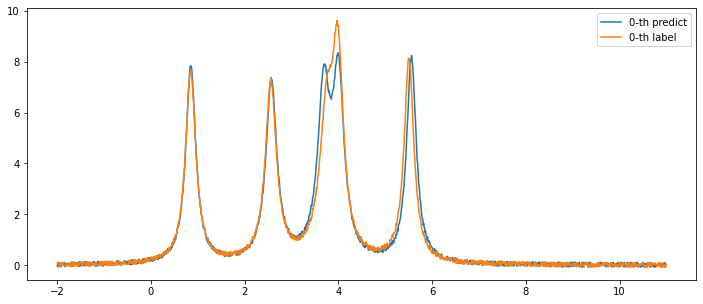

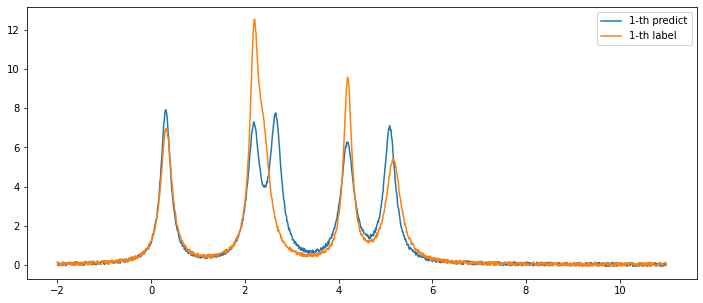

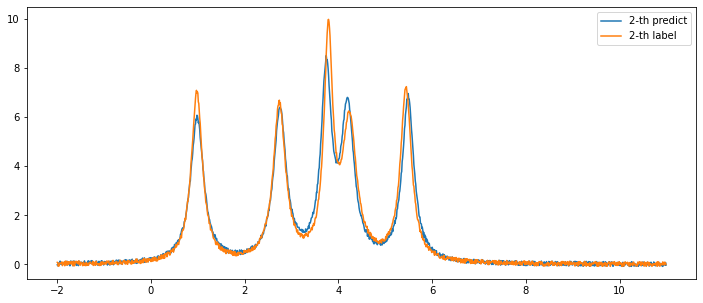

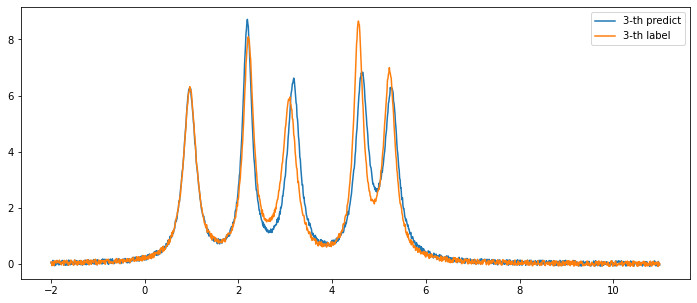

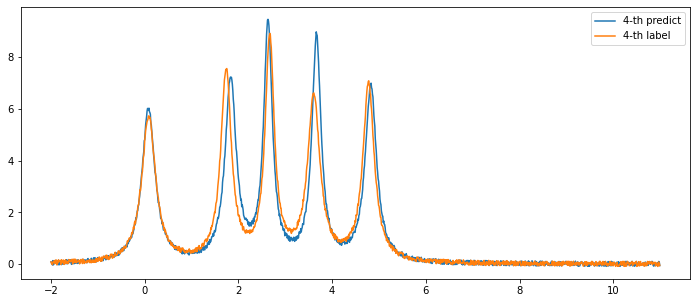

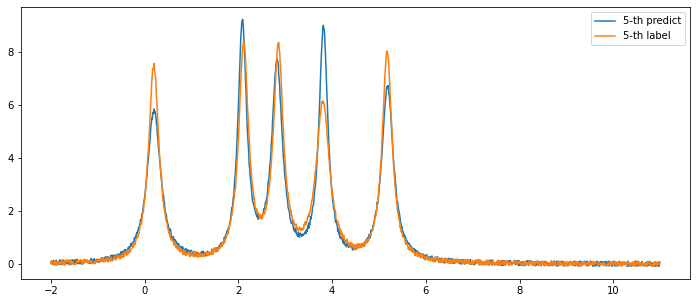

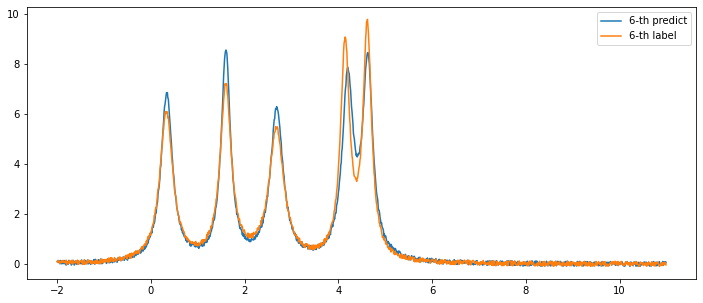

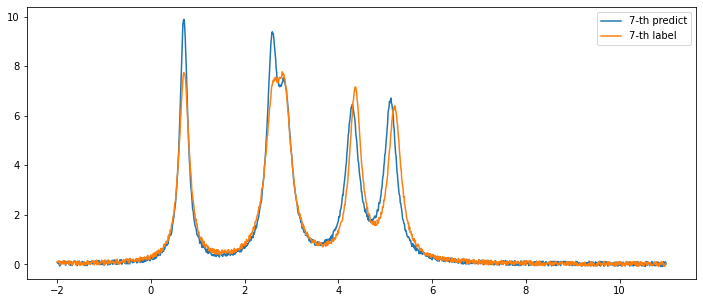

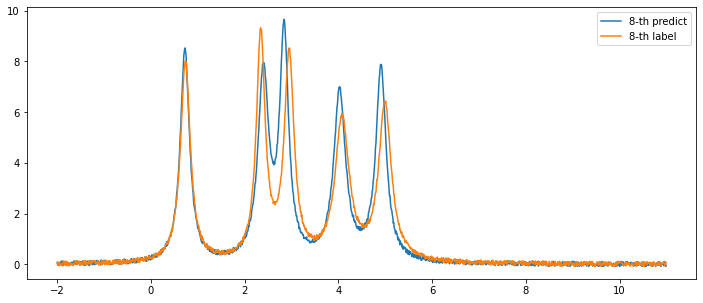

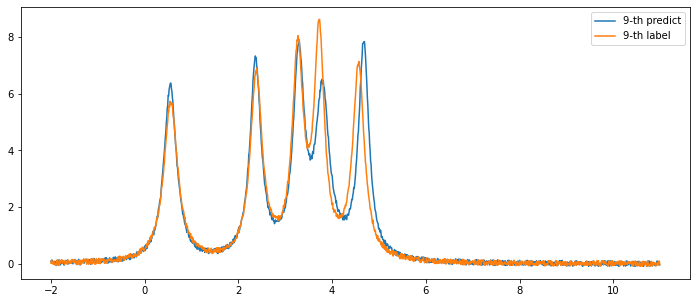

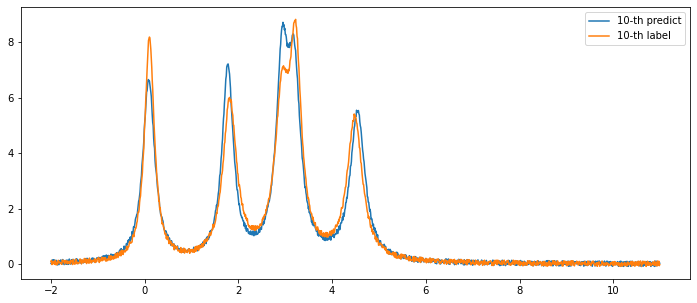

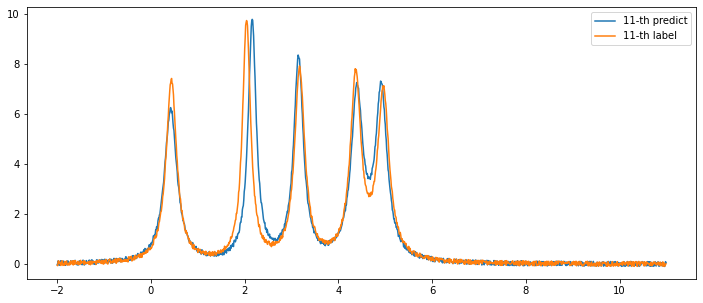

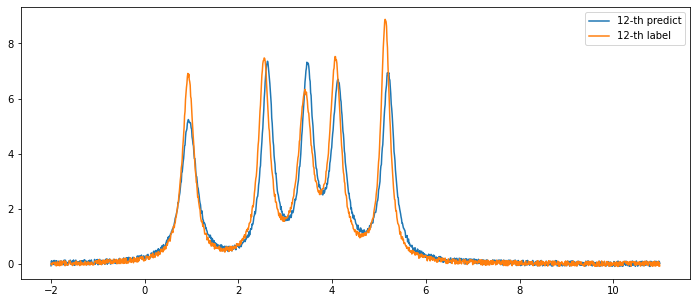

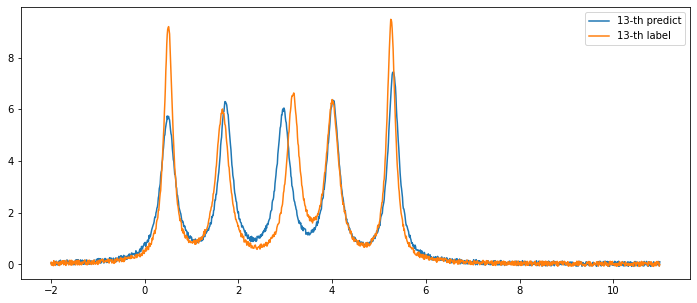

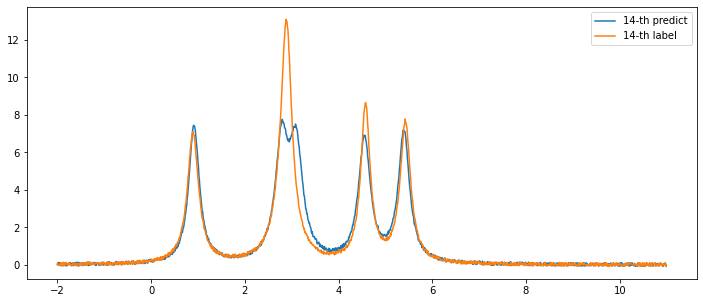

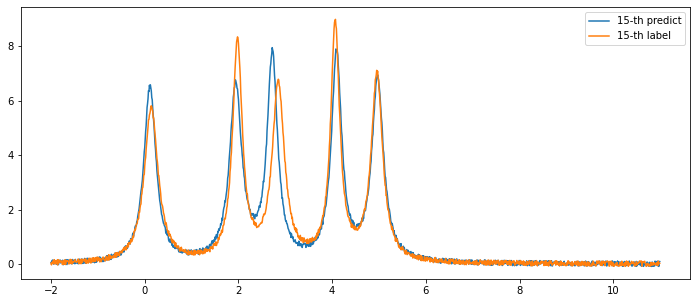

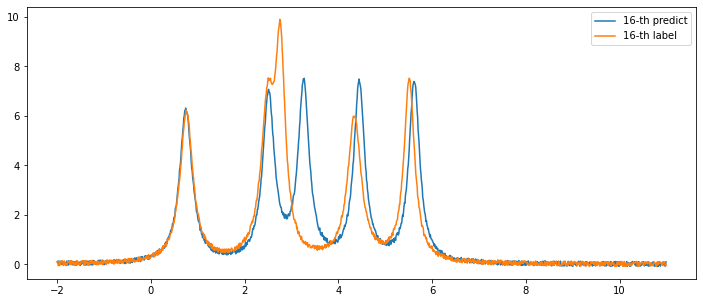

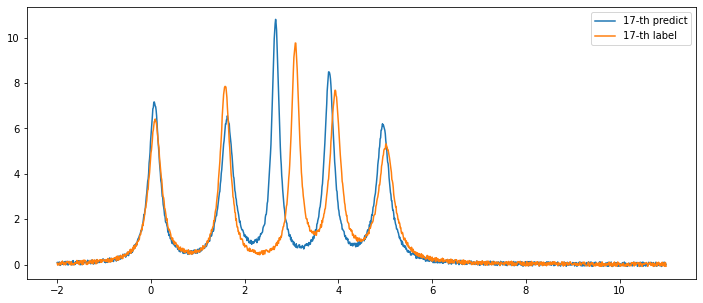

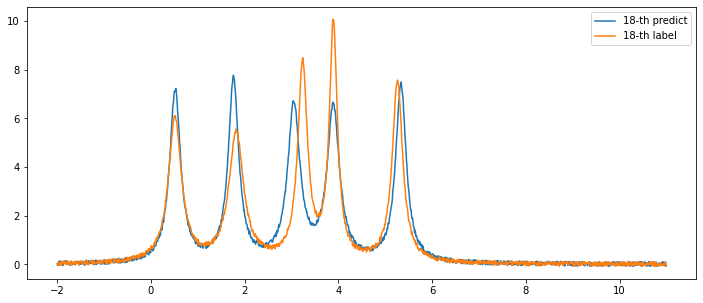

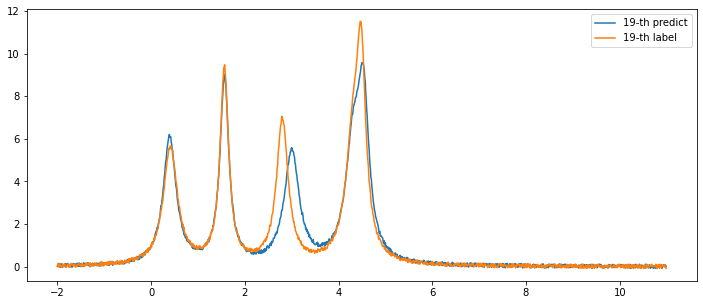

In [23]:
for i in range(20):
    plt.figure(figsize=(12,5))
    plt.plot(x, Lorentzian(x, *list(predict[i])), label=str(i)+'-th predict')
    plt.plot(x, test_data[i], label=str(i)+'-th label')
    #plt.plot(x, simple(x, *list(predict[i])), label=str(i)+'-th exact')
    plt.legend()
    plt.show()

In [24]:
# Check the architecture of the CNN
print(model2.layers[0])
print(model2.layers[1])
print(model2.layers[2])
print(model2.layers[3])
print(model2.layers[4])
print(model2.layers[5])
print(model2.layers[6])
print(model2.layers[7])
print(model2.layers[8])


In [25]:
for i in range(9):
    print(str(i) +'-th layer :', len(model2.layers[i].get_weights()))

0-th layer : 2
1-th layer : 0
2-th layer : 2
3-th layer : 0
4-th layer : 2
5-th layer : 0
6-th layer : 0
7-th layer : 2
8-th layer : 2


In [26]:
layer_0 = model2.layers[0].get_weights()

layer_2 = model2.layers[2].get_weights()

layer_4 = model2.layers[4].get_weights()

layer_5 = model2.layers[5].get_weights()

layer_6 = model2.layers[6].get_weights()



In [27]:
# 첫번째 컨볼루션 필터
filter_0 = layer_0[0]
filter_0.shape # 16개의 필터가 커널사이즈 10으로 존재함

(100, 1, 32)

In [28]:
# 2번째 컨볼루션 필터
filter_2 = layer_2[0]
filter_2.shape

(50, 32, 32)

In [29]:
# 완전연결층
layer_2[1].shape

(32,)

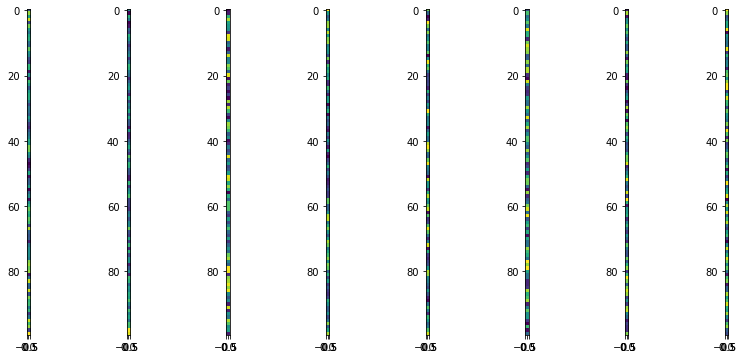

In [30]:
# 첫번째 컨볼루션 필터 시각화
M = 8
plt.figure(figsize=(14, 6))

for i in range(M):  
    plt.subplot(1, M, i + 1)  # Subplot : from 1 to 8
    plt.imshow(filter_0[ :, :,i]) # 1st-conv filter showing
    plt.grid(False)

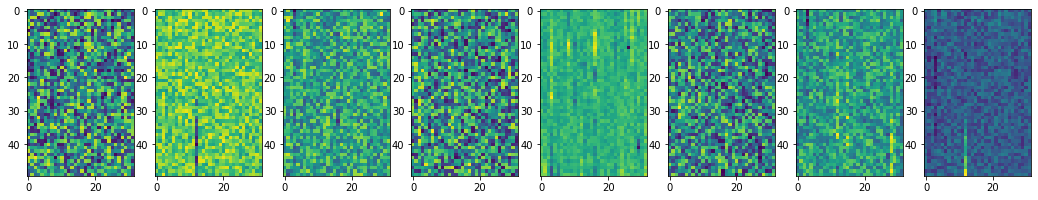

In [31]:
# 두번째 컨볼루션 필터 시각화
M = 8
plt.figure(figsize=(18, 6))

for i in range(M):
    plt.subplot(1, M, i + 1)  # Subplot from 1 to 8
    plt.imshow(filter_2[:, :, i]) # (10, 16) filter showing -> (10, 16) = (10, 1)filter * 16
    plt.grid(False)

In [32]:
# 각각의 레이어에서의 출력을 확인하기
import tensorflow.keras.backend as K

# Outputs of each layers
f0 = K.function([model2.input], [model2.layers[0].output])
f1 = K.function([model2.input], [model2.layers[1].output])
f2 = K.function([model2.input], [model2.layers[2].output])
f3 = K.function([model2.input], [model2.layers[3].output])
f4 = K.function([model2.input], [model2.layers[4].output])
f5 = K.function([model2.input], [model2.layers[5].output])
f6 = K.function([model2.input], [model2.layers[6].output])
f7 = K.function([model2.input], [model2.layers[7].output])


In [33]:
n = 0
x = train_data[n:n+1]

print(x.shape)

(1, 1300, 1)


Text(0.5, 1, 'Input data')

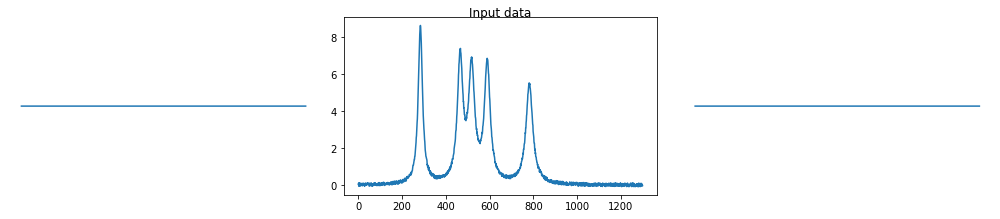

In [34]:
plt.figure(figsize=(14, 3))  # Figure generated

for i in range(3): 
    plt.subplot(1, 3, i + 1)  # three Subplot generated
    if i == 1:                # center plot
        plt.plot(x[0])        # image showed
    else:  
        plt.plot(np.zeros_like(x[0]))  # zero image
        plt.axis("off")
plt.tight_layout()
plt.suptitle("Input data", y=1)
# one image showing at center 

In [35]:
# 1번째 컨볼루션 층 출력결과
z0 = f0([x])[0]
z0.shape

(1, 1201, 32)

Text(0.5, 1.1, 'After 1st Conv1D filter')

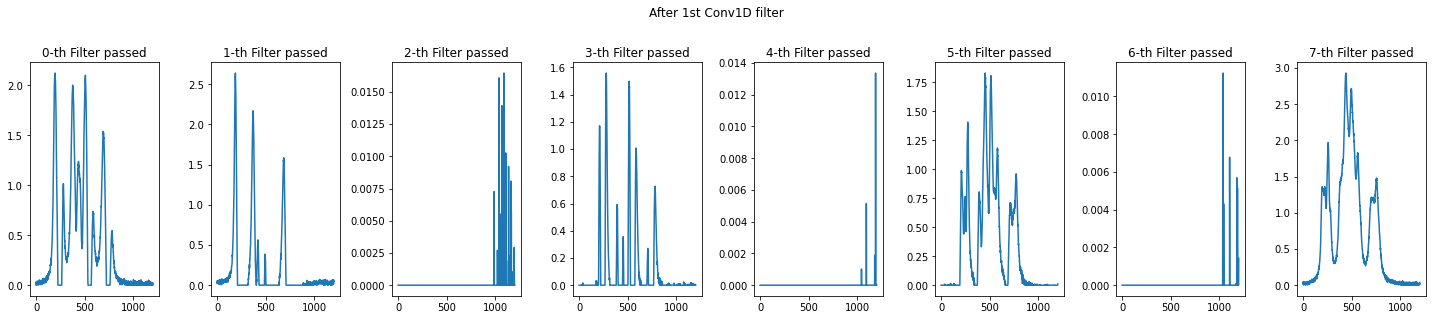

In [36]:
plt.figure(figsize=(20, 4))

for i in range(8):
    plt.subplot(1, 8, i + 1)
    plt.plot(z0[0, :, i])
    plt.axis('on')
    
    plt.title("{}-th Filter passed".format(i))
plt.tight_layout()
plt.suptitle("After 1st Conv1D filter", y=1.1)

In [37]:
# 2번째 맥스풀링층 출력 결과
z1 = f1([x])[0]
print(z1.shape)


(1, 600, 32)


Text(0.5, 1.1, 'After MaxPooling1D')

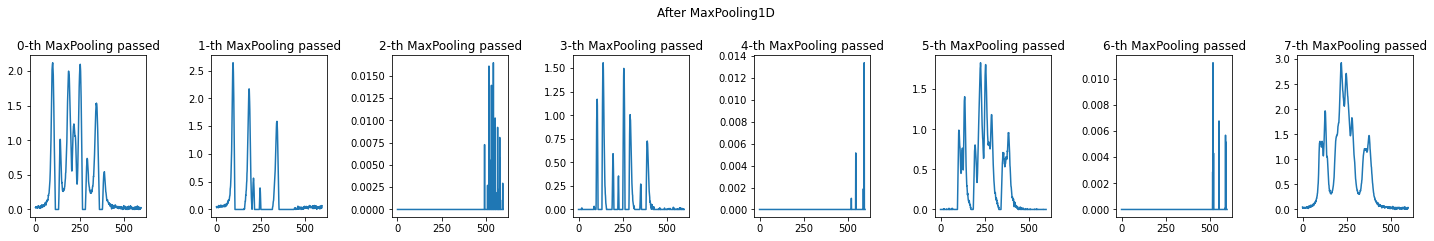

In [38]:
plt.figure(figsize=(20, 3))

for i in range(8):
    plt.subplot(1, 8, i + 1)
    plt.plot(z1[0, :, i])
    
    plt.title("{}-th MaxPooling passed".format(i))
plt.tight_layout()
plt.suptitle("After MaxPooling1D", y=1.1)
        

In [39]:
# 3번째 컨볼루션 층 출력결과
z2 = f2([x])[0]
print(z2.shape)

(1, 551, 32)


Text(0.5, 1.1, 'After 2nd Conv1D')

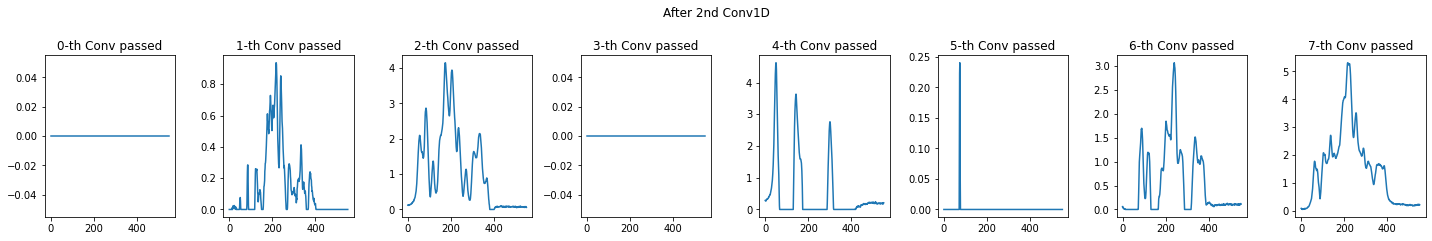

In [40]:
plt.figure(figsize=(20, 3))

for i in range(8):
    plt.subplot(1, 8, i + 1)
    plt.plot(z2[0, :, i])
    
    plt.title("{}-th Conv passed".format(i))
plt.tight_layout()
plt.suptitle("After 2nd Conv1D", y=1.1)

In [41]:
# 4번째 MaxPooling 층 출력결과
z3 = f3([x])[0]
print(z3.shape)

(1, 275, 32)


Text(0.5, 1.1, 'After 2nd MaxPooling')

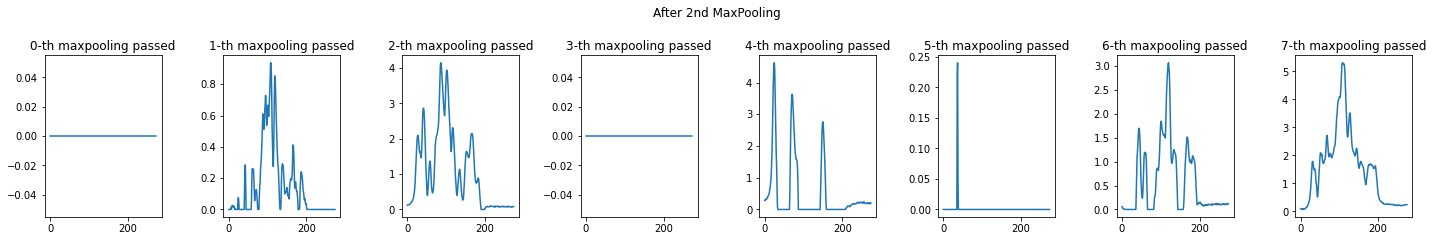

In [42]:
plt.figure(figsize=(20, 3))

for i in range(8):
    plt.subplot(1, 8, i + 1)
    plt.plot(z3[0, :, i])
    
    plt.title("{}-th maxpooling passed".format(i))
plt.tight_layout()
plt.suptitle("After 2nd MaxPooling", y=1.1)

In [43]:
# 5번째층 GlobalMaxPooling층 출력 결과
z4 = f4([x])[0]
print(z4.shape)
print(z4)

(1, 246, 32)
[[[0.         0.         0.         ... 0.1957501  1.0904112  0.17347813]
  [0.         0.         0.         ... 0.18581693 1.0171081  0.31791806]
  [0.         0.         0.         ... 0.17412584 0.95793176 0.5439461 ]
  ...
  [0.         0.         0.         ... 0.         0.27902517 0.25030953]
  [0.         0.         0.         ... 0.         0.27917692 0.24920133]
  [0.         0.         0.         ... 0.         0.28152195 0.25562644]]]


TypeError: ignored

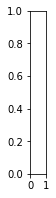

In [44]:
plt.figure(figsize=(10, 3))
plt.imshow(z4, aspect=10)
plt.xticks([]); plt.yticks([]); plt.grid(False)
plt.title("vectorizing")

In [ ]:
# 6번째층 Dense Layer(Fully Connected Layer) 출력 결과
z5 = f5([x])[0]
print(z5.shape)

plt.figure(figsize=(12, 4))
plt.imshow(z5)
plt.show()

plt.figure(figsize=(12, 4))
plt.plot(z5[0])
plt.show()

In [ ]:
# 7번째 Dropout 층 출력 결과
z6 = f6([x])[0]
print(z6.shape)

plt.figure(figsize=(12, 4))
plt.imshow(z6)
plt.show()


plt.figure(figsize=(12, 4))
plt.plot(z6[0])
plt.show()

In [ ]:
# 8번째 최종출력층 출력 결과
z7 = f7([x])[0]
print(z7)

plt.figure(figsize=(10,2))
plt.imshow(z7)
plt.show()

In [ ]:
# 1차원 데이터에 대응되는 라벨은 뭘로? => 적분값과 peak 수는 안정적인 라벨로 작용, 하지만 목적에 안맞는다.
# 라벨 -> 원래 의도대로 mean position, width로 되돌림
# 로렌치안 함수 정의에 약간의 오류 발견 -> 수정, 재시도하였음
# 이전보다 상당히 나아진 듯, 

# 해석하기 어려운 것
# 각 컨볼루션 층에서의 필터가 의미하는 것?? -> 시각화해도 의미를 설명하기 어렵다.
# 각각의 레이어의 정보를 완전히 표현하는 방법 좀 더 공부..